## K-Means Method

In [21]:
#IMPORTS
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import folium

In [3]:
data = pd.read_table("./data/cleaned-data.csv", sep=",")

In [11]:
# Scale the data
columns_to_drop = ['id', 'user', 'tags', 'title',  'date_taken_minute', 'date_taken_hour', 'date_taken_day', 'date_taken_month', 'date_taken_year', 'date_upload_minute', 'date_upload_hour', 'date_upload_day', 'date_upload_month', 'date_upload_year', 'Unnamed: 16',	'Unnamed: 17',	'Unnamed: 18']
df_clustering = data.drop(columns_to_drop , axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
#print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
#scaled_data_df.head()

In [8]:
# number of clusters 
k = 150
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=150)

In [9]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [112 106   8 ...  75  75  68]


In [12]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 1045.496727836301


**RESULTS**

* Add a column `cluster kmeans` to the `data_cleaned` DataFrame containing the labels of k-means clustering for `k=150`

In [ ]:
data['k-means labels'] = labels

In [ ]:
# Calculate silhouette scores
silhouette_avg = silhouette_score(scaled_data, labels, metric='euclidean')
sample_silhouette_values = silhouette_samples(scaled_data, labels, metric='euclidean')
scaled_data_df['silhouette kmeans'] = sample_silhouette_values

print(f"Average silhouette score: {silhouette_avg}")
print(f"Sample Silhouette values: {sample_silhouette_values}")

Average silhouette score: 0.5294805470162657
Sample Silhouette values: [0.47452932 0.41454391 0.14958642 ... 0.50354532 0.50354532 0.64602208]


In [ ]:
# ANSWER
def plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3):
    # Create the plot
    fig = plt.figure(figsize=(10, 6))
    
    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for cluster i
        ith_cluster_values = sample_silhouette_values[labels == i]
        ith_cluster_values.sort()
        
        size_cluster_i = ith_cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_values,
                         alpha=0.7)
        
        # Label the silhouette plots
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        
        y_lower = y_upper + 10
    
    # Add vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', 
                label=f'Average Silhouette: {silhouette_avg:.3f}')
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return fig

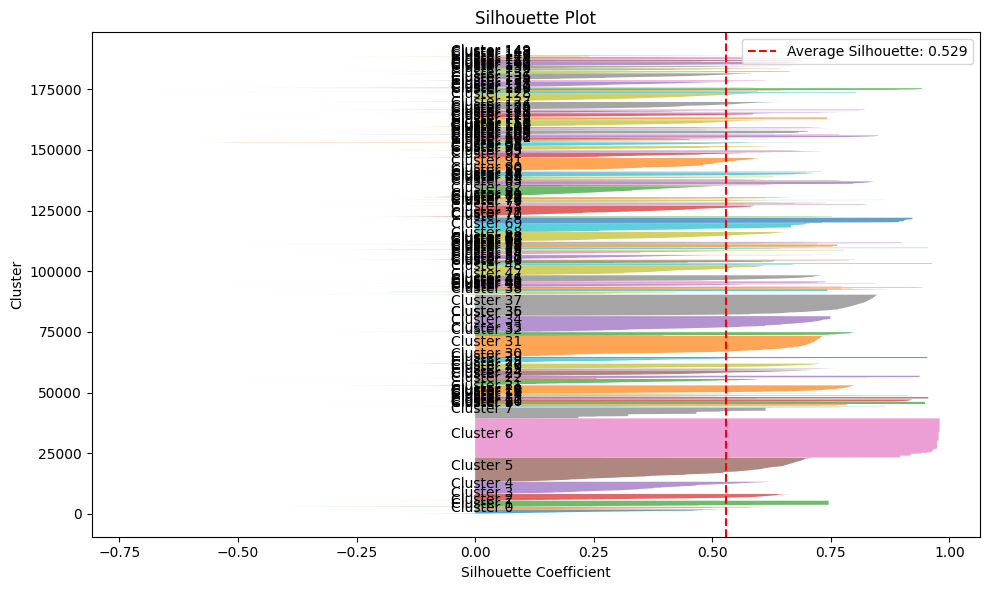

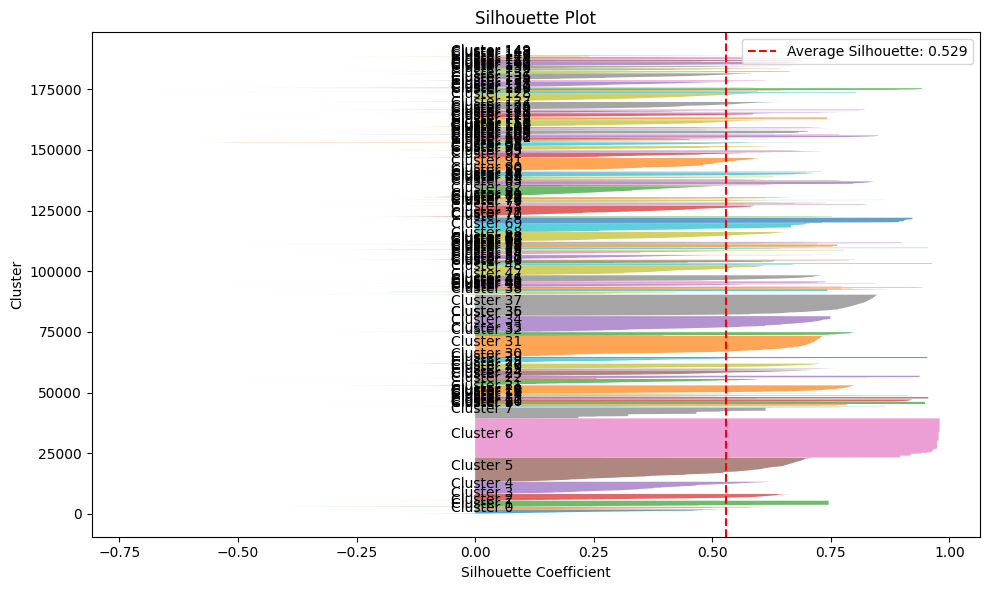

In [ ]:
plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=150)

##### Data mining

In [18]:
from collections import Counter
import re

dataset_cluster = {}

dataset = data[~data['title'].isna()][['title', 'k-means labels']]

for cluster in dataset['k-means labels'].unique():
    dataset_cluster[cluster] = dataset[dataset['k-means labels'] == cluster]

    dataset_cluster_tokens = [nltk.word_tokenize(title, 'french') for title in dataset_cluster[cluster]['title']]

    # Remove stop words in french
    stop_words = set(nltk.corpus.stopwords.words('french'))
    dataset_cluster_tokens = [[token for token in tokens if token.lower() not in stop_words] for tokens in dataset_cluster_tokens]

    # Remove stopwords in english
    stop_words = set(nltk.corpus.stopwords.words('english'))
    dataset_cluster_tokens = [[token for token in tokens if token.lower() not in stop_words] for tokens in dataset_cluster_tokens]

    # Remove symbols like '#' and '()'
    dataset_cluster_tokens = [[re.sub(r'[^\w\s]', '', token) for token in tokens] for tokens in dataset_cluster_tokens]

    # Remove empty tokens
    dataset_cluster_tokens = [[token for token in tokens if token] for tokens in dataset_cluster_tokens]

    # Remove the word 'lyon' and 'france'
    dataset_cluster_tokens = [[token for token in tokens if token.lower() not in ['lyon', 'france']] for tokens in dataset_cluster_tokens]

    # Remove numbers
    dataset_cluster_tokens = [[token for token in tokens if not token.isnumeric()] for tokens in dataset_cluster_tokens]

    # Flatten the list of tokenized titles
    all_tokens = [token for sublist in dataset_cluster_tokens for token in sublist]

    # Count the frequency of each word
    word_freq = Counter(all_tokens)

    # write the most common words in a dictionary
    dataset_cluster[cluster] = word_freq.most_common(1)

dataset_cluster


{112: [('Saône', 44)],
 8: [('Incity', 170)],
 89: [('Karna', 79)],
 0: [('Vieux', 358)],
 36: [('Fourvière', 1742)],
 26: [('BeauxArts', 678)],
 1: [('Chaos', 8268)],
 40: [('Rhône', 216)],
 115: [('SaintGeorges', 133)],
 119: [('Berliet', 18)],
 96: [('paper', 489)],
 16: [('paper', 59)],
 68: [('Bellecour', 720)],
 29: [('Lione', 233)],
 149: [('Open', 148)],
 56: [('Jean', 712)],
 137: [('DoctorWhoClassic', 109)],
 61: [('Canuts', 47)],
 77: [('Rhône', 77)],
 69: [('Parc', 208)],
 140: [('Deux', 76)],
 63: [('Lumière', 200)],
 85: [('SIdO', 485)],
 139: [('Place', 244)],
 58: [('RochetailléesurSaône', 156)],
 93: [('saxotaz', 243)],
 130: [('Lumières', 390)],
 133: [('PartDieu', 150)],
 25: [('Sharpei', 73)],
 22: [('Fourvière', 264)],
 136: [('river', 31)],
 114: [('Parc', 261)],
 33: [('Perrache', 151)],
 23: [('Parc', 220)],
 75: [('Fête', 178)],
 118: [('Brotteaux', 74)],
 80: [('paper', 1081)],
 124: [('Space', 38)],
 50: [('Mont', 23)],
 43: [('Forum', 161)],
 14: [('saxotaz'

In [27]:
# Create a new column in the data DataFrame to store the most common words for each cluster
data['common_words'] = data['k-means labels'].map(lambda x: dataset_cluster.get(x, []))

### Ploting with K-Means

In [29]:
#Plotting with kmeans
data.groupby('k-means labels')[['lat', 'long']].mean()
# Create a folium map centered around the mean latitude and longitude of the clusters
map_clusters = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each cluster center
for cluster_label, cluster_center in data.groupby('k-means labels')[['lat', 'long']].mean().iterrows():
    cluster_name = data[data['k-means labels'] == cluster_label]['common_words'].iloc[0][0][0]
    folium.Marker(
        location=[cluster_center['lat'], cluster_center['long']],
        popup=f'Cluster {cluster_label}: {cluster_name}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_clusters)

map_clusters

In [30]:
#Different way of plotting with kmeans
map_clusters
# Randomly sample 1500 objects from filtered_data_dsbcan
sampled_data = data.sample(n=1500)

# Create a folium map centered around the mean latitude and longitude of the sampled data
map_sampled_clusters = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each sampled data point
# Define a color palette
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add markers for each sampled data point with different colors for different clusters
for _, row in sampled_data[sampled_data['k-means labels'] != -1].iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f'Cluster {row["k-means labels"]}',
        icon=folium.Icon(color=colors[row["k-means labels"] % len(colors)], icon='info-sign')
    ).add_to(map_sampled_clusters)

map_sampled_clusters